In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Model

In [2]:
inputlayer = tf.keras.layers.Input(shape=(None,None,3))
C1 = Conv2D(64, (3,3), strides=(1,1), padding="same",name='CONV1')(inputlayer)
A1 = tf.keras.layers.LeakyReLU(alpha=0.3)(C1)

C2 = Conv2D(64, (3,3),padding="same",name='CONV2')(A1)
A2 = tf.keras.layers.LeakyReLU(alpha=0.3,name='A2')(C2)

C3 = Conv2D(64, (3,3),padding="same",name='CONV3')(A2)
A3 = tf.keras.layers.LeakyReLU(alpha=0.3,name='A3')(C3)
Sum1  = tf.keras.layers.add([A1,A3])

C4 = Conv2D(64, (3,3),padding="same",name='CONV4')(Sum1)
A4 = tf.keras.layers.LeakyReLU(alpha=0.3,name='A4')(C4)

C5 = Conv2D(64, (3,3),padding="same",name='CONV5')(A4)
A5 = tf.keras.layers.LeakyReLU(alpha=0.3,name='A5')(C2)
Sum2  = tf.keras.layers.add([A1,A5])


C6 = Conv2D(3, (3,3),padding="same",name='CONV6')(Sum2)
A6 = tf.keras.layers.LeakyReLU(alpha=0.3,name='A6')(C6)


model = Model(inputs=inputlayer , outputs = A6)
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
CONV1 (Conv2D)                  (None, None, None, 6 1792        input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, None, None, 6 0           CONV1[0][0]                      
__________________________________________________________________________________________________
CONV2 (Conv2D)                  (None, None, None, 6 36928       leaky_re_lu[0][0]                
_____________

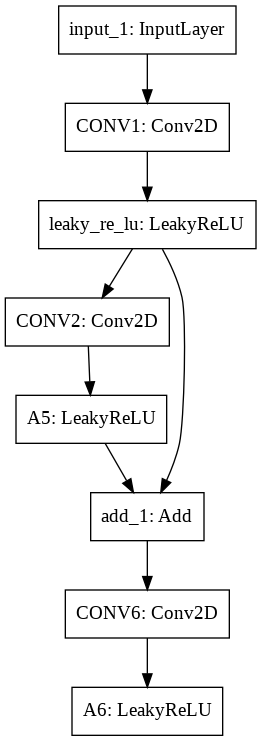

In [3]:
tf.keras.utils.plot_model(model, 'my_first_model.png')